### Khám phá dữ liệu COVID

# BÀI THỰC HÀNH KHÁM PHÁ DỮ LIỆU COVID-19


In [ ]:
# 1. IMPORT THƯ VIỆN CẦN THIẾT
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Hiển thị đầy đủ cột
pd.set_option('display.max_columns', None)

# 2. ĐỌC DỮ LIỆU
covid_data = pd.read_csv("data/compact.csv")

# Chọn một số cột cần thiết cho bài phân tích
covid_data = covid_data[['country', 'continent', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]

# Xem 5 dòng đầu
print("5 dòng đầu tiên:")
print(covid_data.head())

print("\nKiểu dữ liệu và thông tin:")
print(covid_data.info())

print("\nKích thước tập dữ liệu:", covid_data.shape)

📌 5 dòng đầu tiên:
       country continent        date  total_cases  new_cases  total_deaths  \
0  Afghanistan      Asia  2020-01-01          NaN        NaN           NaN   
1  Afghanistan      Asia  2020-01-02          NaN        NaN           NaN   
2  Afghanistan      Asia  2020-01-03          NaN        NaN           NaN   
3  Afghanistan      Asia  2020-01-04          0.0        0.0           0.0   
4  Afghanistan      Asia  2020-01-05          0.0        0.0           0.0   

   new_deaths  
0         NaN  
1         NaN  
2         NaN  
3         0.0  
4         0.0  

📊 Kiểu dữ liệu và thông tin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530292 entries, 0 to 530291
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       530292 non-null  object 
 1   continent     490452 non-null  object 
 2   date          530292 non-null  object 
 3   total_cases   516426 non-null  float64
 4   new_cas

# PHẦN 1: THỐNG KÊ MÔ TẢ


In [ ]:
# Loại bỏ giá trị NaN ở cột 'new_cases' để tính toán chính xác
new_cases = covid_data['new_cases'].dropna()

# Tính các chỉ số thống kê
data_mean = np.mean(new_cases)
data_median = np.median(new_cases)
data_mode = stats.mode(new_cases, keepdims=True)[0][0]
data_variance = np.var(new_cases)
data_sd = np.std(new_cases)
data_max = np.max(new_cases)
data_min = np.min(new_cases)
data_range = data_max - data_min
data_percentile = np.percentile(new_cases, 60)
data_quartiles = np.percentile(new_cases, [25, 50, 75])
data_IQR = stats.iqr(new_cases)

# In kết quả
print("\n THỐNG KÊ MÔ TẢ CỘT 'new_cases'")
print(f"Mean (Trung bình): {data_mean:.2f}")
print(f"Median (Trung vị): {data_median:.2f}")
print(f"Mode (Mode): {data_mode}")
print(f"Variance (Phương sai): {data_variance:.2f}")
print(f"Standard Deviation (Độ lệch chuẩn): {data_sd:.2f}")
print(f"Range (Khoảng giá trị): {data_range:.2f}")
print(f"60th Percentile: {data_percentile:.2f}")
print(f"Quartiles (Q1, Q2, Q3): {data_quartiles}")
print(f"IQR (Khoảng tứ phân vị): {data_IQR:.2f}")



🔹 THỐNG KÊ MÔ TẢ CỘT 'new_cases'
Mean (Trung bình): 10590.08
Median (Trung vị): 0.00
Mode (Mode): 0.0
Variance (Phương sai): 13834902307.94
Standard Deviation (Độ lệch chuẩn): 117621.86
Range (Khoảng giá trị): 8401906.00
60th Percentile: 0.00
Quartiles (Q1, Q2, Q3): [ 0.  0. 64.]
IQR (Khoảng tứ phân vị): 64.00



# PHẦN 2: XỬ LÝ & TRỰC QUAN HÓA DỮ LIỆU



🔍 Số lượng giá trị thiếu theo từng cột:
country             0
continent       39840
date                0
total_cases     13866
new_cases       17148
total_deaths    13866
new_deaths      16277
dtype: int64


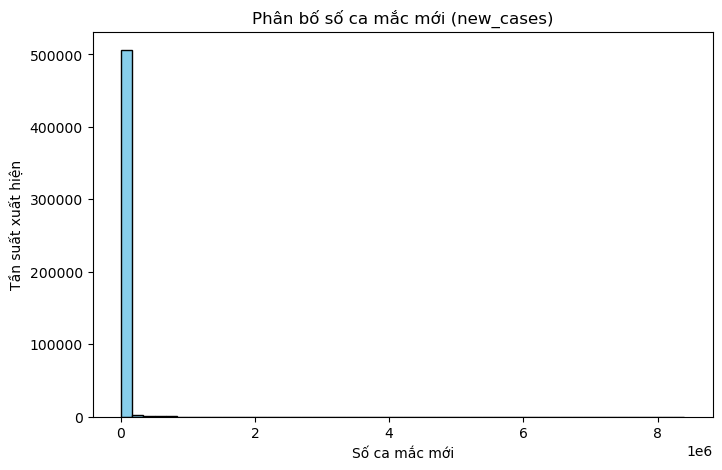

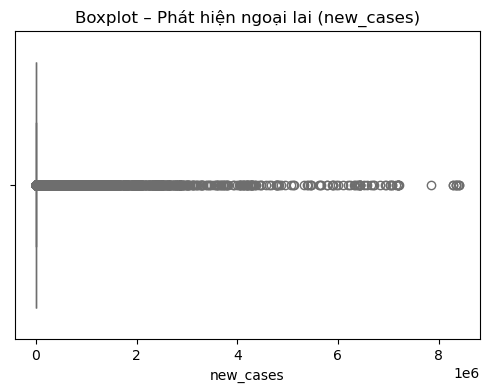

In [ ]:
# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu theo từng cột:")
print(covid_data.isnull().sum())

# Histogram – phân bố số ca mắc mới
plt.figure(figsize=(8,5))
plt.hist(new_cases, bins=50, color='skyblue', edgecolor='black')
plt.title("Phân bố số ca mắc mới (new_cases)")
plt.xlabel("Số ca mắc mới")
plt.ylabel("Tần suất xuất hiện")
plt.show()

# Boxplot – phát hiện giá trị ngoại lai
plt.figure(figsize=(6,4))
sns.boxplot(x=new_cases, color='lightcoral')
plt.title("Boxplot – Phát hiện ngoại lai (new_cases)")
plt.show()


# PHẦN 3: PHÂN TÍCH ĐƠN BIẾN & HAI BIẾN



# 🔹 3.1. Phân tích đơn biến: tổng ca mắc theo châu lục

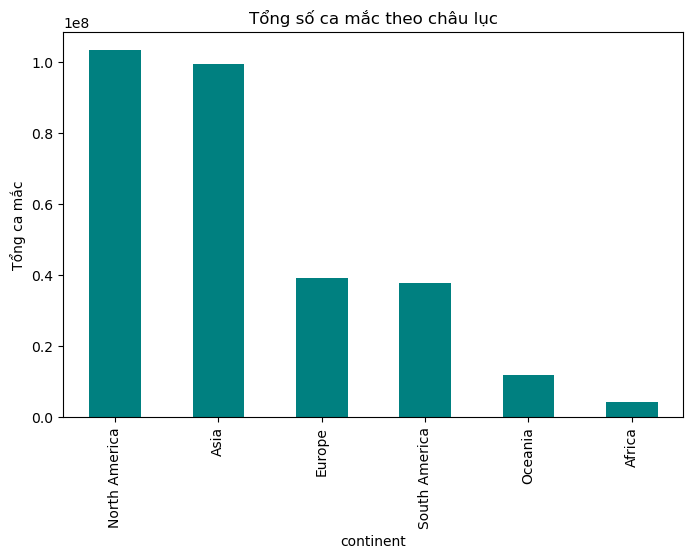

In [ ]:
continent_cases = covid_data.groupby('continent')['total_cases'].max().dropna().sort_values(ascending=False)
plt.figure(figsize=(8,5))
continent_cases.plot(kind='bar', color='teal')
plt.title("Tổng số ca mắc theo châu lục")
plt.ylabel("Tổng ca mắc")
plt.show()


# 🔹 3.2. Phân tích hai biến: mối quan hệ giữa ca mắc và ca tử vong

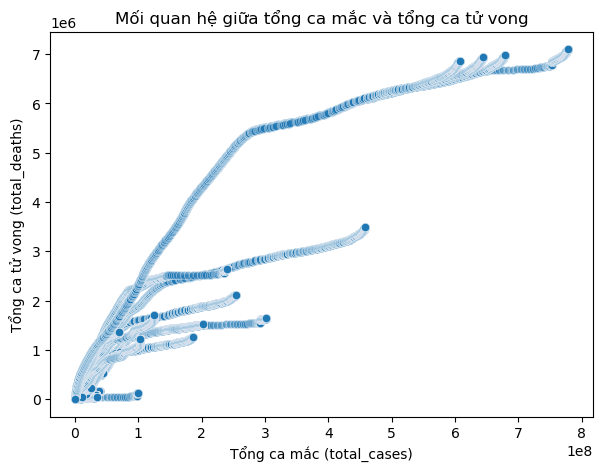

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=covid_data, x='total_cases', y='total_deaths', alpha=0.5)
plt.title("Mối quan hệ giữa tổng ca mắc và tổng ca tử vong")
plt.xlabel("Tổng ca mắc (total_cases)")
plt.ylabel("Tổng ca tử vong (total_deaths)")
plt.show()

# 🔹 3.3. Hệ số tương quan

In [ ]:
corr = covid_data[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()
print("\n🔹 Ma trận tương quan:")
print(corr)


🔹 Ma trận tương quan:
              total_cases  total_deaths  new_cases  new_deaths
total_cases      1.000000      0.969058   0.254813    0.207687
total_deaths     0.969058      1.000000   0.330954    0.338951
new_cases        0.254813      0.330954   1.000000    0.560647
new_deaths       0.207687      0.338951   0.560647    1.000000


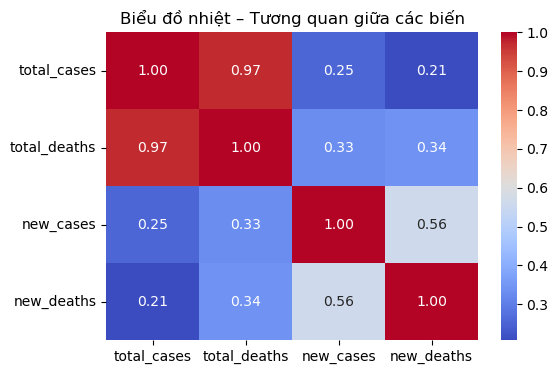

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Biểu đồ nhiệt – Tương quan giữa các biến")
plt.show()

# KẾT LUẬN NHANH


In [ ]:
print("\n🧾 KẾT LUẬN:")
print("- Dữ liệu COVID-19 có phân bố lệch phải, nhiều giá trị ngoại lai do các đợt bùng phát lớn.")
print("- Có tương quan mạnh giữa tổng ca mắc và tổng ca tử vong (r > 0.9).")
print("- Một số giá trị bị thiếu (NaN) cần xử lý trước khi huấn luyện mô hình hoặc phân tích sâu hơn.")



🧾 KẾT LUẬN:
- Dữ liệu COVID-19 có phân bố lệch phải, nhiều giá trị ngoại lai do các đợt bùng phát lớn.
- Có tương quan mạnh giữa tổng ca mắc và tổng ca tử vong (r > 0.9).
- Một số giá trị bị thiếu (NaN) cần xử lý trước khi huấn luyện mô hình hoặc phân tích sâu hơn.
